# 部分采样

#### 1. 索引

![6'3-索引.png](./img/6'3-索引.png)

#### 2.切片

tensor[ start : end : step=1 ]

- 切片是一个左闭右开的区间
- end 可以省略
- step=1，可以省略

In [4]:
import tensorflow as tf

*一维张量*

In [5]:
a = tf.range(10)

In [11]:
# 取出所有
a[::]

<tf.Tensor: id=27, shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [10]:
# 步长=2，取出偶数
a[::2]

<tf.Tensor: id=23, shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8])>

In [9]:
# 逆序
a[::-1]

<tf.Tensor: id=19, shape=(10,), dtype=int32, numpy=array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])>

*二维张量*

In [12]:
TRAIN_URL = 'http://download.tensorflow.org/adata/iris_training.csv'
train_path = tf.keras.utils.get_file(TRAIN_URL.split('/')[-1], TRAIN_URL)

In [13]:
import pandas as pd
df_iris = pd.read_csv(train_path)

In [16]:
import numpy as np
np_iris = np.array(df_iris)

In [18]:
iris = tf.convert_to_tensor(np_iris)
iris.shape

TensorShape([120, 5])

In [22]:
# 读取第一个样本中的所有数据，包括属性和类别
iris[0,:]

<tf.Tensor: id=41, shape=(5,), dtype=float64, numpy=array([6.4, 2.8, 5.6, 2.2, 2. ])>

In [23]:
# 读取前5个样本的属性
iris[0:5, 0:4]

<tf.Tensor: id=45, shape=(5, 4), dtype=float64, numpy=
array([[6.4, 2.8, 5.6, 2.2],
       [5. , 2.3, 3.3, 1. ],
       [4.9, 2.5, 4.5, 1.7],
       [4.9, 3.1, 1.5, 0.1],
       [5.7, 3.8, 1.7, 0.3]])>

*三维张量*

In [30]:
# 手写数字数据集MNIST
mnist = tf.keras.datasets.mnist
(mnist,_),(_,_) = mnist.load_data()

In [31]:
mnist.shape

(60000, 28, 28)

In [33]:
import matplotlib.pyplot as plt

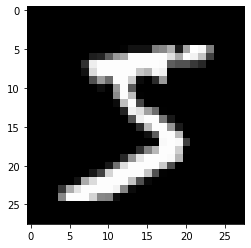

In [41]:
# mnist[0,::,::] 第一张图片
plt.imshow(mnist[0,::,::],cmap='gray')

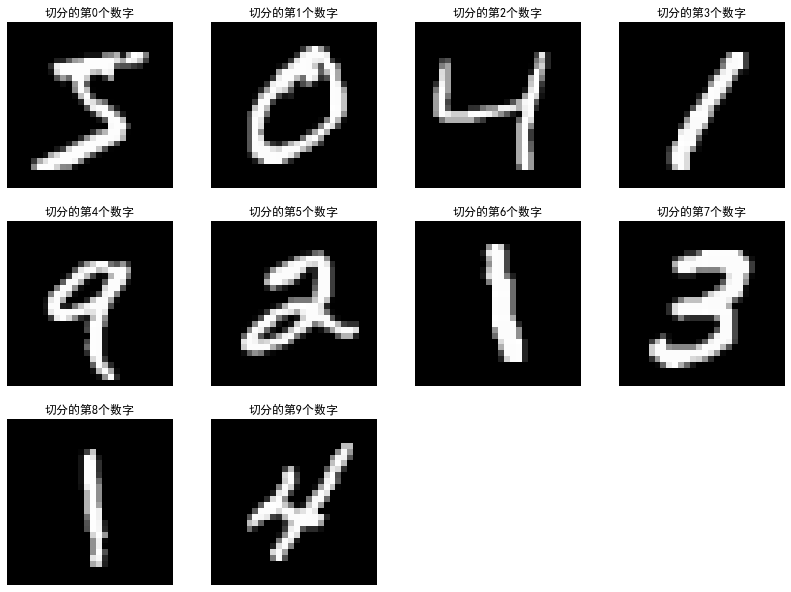

In [55]:
# 前10张图片
pre_10_img = mnist[0:10,::,::]

plt.figure(figsize=(14,14))
plt.rcParams['font.family'] = 'SimHei'

for i in range(10):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    img = pre_10_img[i]
    plt.imshow(img, cmap='gray')
    plt.title(f"切分的第{i}个数字")

In [57]:
# 前20张图片的所有的行，隔行采样
pre_20_partition_row = mnist[0:20, 0:28:2,:]
pre_20_partition_row.shape

(20, 14, 28)

In [58]:
# 所有的行与列都隔行采样
partition_row_column = mnist[:, 0:28:2,0:28:2]
partition_row_column.shape

(60000, 14, 14)

In [64]:
# 三维彩色图片lena
from PIL import Image

img = Image.open('./lena.tiff')

In [73]:
lena = tf.convert_to_tensor(np.array(img))
lena.shape

TensorShape([512, 512, 3])

In [81]:
lena[0]

<tf.Tensor: id=83, shape=(512, 3), dtype=uint8, numpy=
array([[226, 137, 125],
       [226, 137, 125],
       [223, 137, 133],
       ...,
       [230, 148, 122],
       [221, 130, 110],
       [200,  99,  90]], dtype=uint8)>

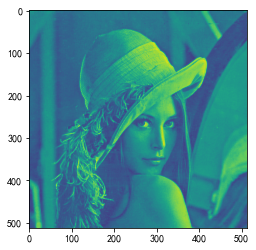

In [89]:
# 只选择R通道
plt.imshow(lena[:,:,2])